In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.metrics import classification_report_imbalanced
from imblearn.over_sampling import RandomOverSampler,SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

# **Exploration**

Importation de la dataset

In [ ]:
df=pd.read_csv('movie_df.csv')
df.head()

,movieId,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,directors,writers,averageRating,...,tag1,tag2,directorAvgRating,actor1AvgRating,actor2AvgRating,writerAvgRating,tag0AvgRating,tag1AvgRating,tag2AvgRating,genresAvgRating
0,1,tt0114709,Toy Story,Toy Story,1995,81,"adventure,animation,comedy",nm0005124,"nm0005124,nm0230032,nm0004056,nm0710020,nm0923...",4.15,...,244.0,786.0,3.690000,3.513235,3.275000,3.635714,3.750000,3.457143,4.100000,3.193560
1,2,tt0113497,Jumanji,Jumanji,1995,104,"adventure,comedy,family",nm0002653,"nm0378144,nm0852430,nm0833164,nm0885575",3.55,...,584.0,204.0,3.277778,3.153125,3.277778,3.480000,3.008333,2.861111,3.152174,3.113986
2,3,tt0113228,Grumpier Old Men,Grumpier Old Men,1995,101,"comedy,romance",nm0222043,nm0425756,3.35,...,901.0,902.0,3.115000,3.336842,3.377273,2.875000,2.911765,2.745000,2.761111,3.172996
3,4,tt0114885,Waiting to Exhale,Waiting to Exhale,1995,124,"comedy,drama,romance",nm0001845,"nm0573334,nm0060103",3.00,...,201.0,439.0,2.850000,3.000000,2.983333,2.925000,3.138333,3.105714,3.096552,3.216009
4,5,tt0113041,Father of the Bride Part II,Father of the Bride Part II,1995,106,"comedy,family,romance",nm0796124,"nm0352443,nm0329304,nm0583600,nm0796124",3.05,...,383.0,902.0,3.021429,3.165000,3.403125,3.485714,2.911765,3.162500,2.761111,3.151227


Vérification de l'existence de données manquantes

In [ ]:
def check_missing(data_df):
    total = data_df.isnull().sum().sort_values(ascending = False)
    percent = (data_df.isnull().sum()/data_df.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

check_missing(df).T

,Total,Percent
tags_list,16767.0,74.042835
tag0AvgRating,16767.0,74.042835
tag2AvgRating,16767.0,74.042835
tag1AvgRating,16767.0,74.042835
tag0,16767.0,74.042835
tag2,16767.0,74.042835
tag1,16767.0,74.042835
overview,387.0,1.708987
genres,0.0,0.000000
tconst,0.0,0.000000


In [ ]:
df.describe()

,movieId,startYear,runtimeMinutes,averageRating,numVotes,wRating,tag0,tag1,tag2,directorAvgRating,actor1AvgRating,actor2AvgRating,writerAvgRating,tag0AvgRating,tag1AvgRating,tag2AvgRating,genresAvgRating
count,22645.000000,22645.000000,22645.000000,22645.000000,2.264500e+04,22645.000000,5878.000000,5878.000000,5878.000000,22645.000000,22645.000000,22645.000000,22645.000000,5878.000000,5878.000000,5878.000000,22645.000000
mean,54567.488585,1987.583175,102.019121,3.177359,3.608553e+04,6.408509,566.728309,579.953896,571.510037,3.177359,3.177359,3.177359,3.177359,3.263687,3.263687,3.263687,3.181314
std,44152.111625,23.663400,20.972202,0.493258,1.206540e+05,0.776583,326.173803,324.658157,321.485742,0.412228,0.401008,0.413136,0.433211,0.326455,0.317875,0.321402,0.122234
min,1.000000,1912.000000,40.000000,0.650000,7.000000e+00,1.647890,1.000000,1.000000,1.000000,0.650000,0.650000,0.650000,0.650000,1.150000,1.730000,1.100000,0.000000
25%,6019.000000,1972.000000,90.000000,2.900000,1.591000e+03,6.011151,276.000000,293.000000,292.000000,2.975000,2.992593,2.991667,2.950000,3.025000,3.037500,3.054167,3.108821
50%,55603.000000,1996.000000,99.000000,3.250000,4.604000e+03,6.415323,575.000000,592.000000,581.000000,3.250000,3.247561,3.225000,3.250000,3.270000,3.281250,3.292262,3.191516
75%,95491.000000,2007.000000,110.000000,3.500000,1.806600e+04,6.886517,862.000000,864.000000,863.000000,3.450000,3.432353,3.445833,3.464286,3.490000,3.475000,3.475000,3.268131
max,131262.000000,2021.000000,442.000000,4.650000,2.970653e+06,9.299009,1128.000000,1128.000000,1128.000000,4.450000,4.450000,4.525000,4.600000,4.450000,4.200000,4.200000,3.570270


Distribution par genre

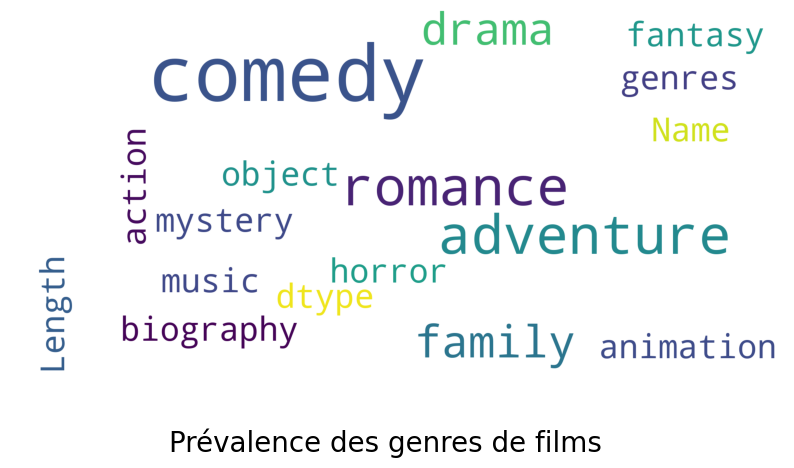

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=17,
        max_font_size=40,
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df['genres'], title = 'Prévalence des genres de films')

# **Recommandation par similarité**

Utilisation des similitudes, calculées en fonction du titre du film

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

tfidf = TfidfVectorizer(stop_words='english',max_features=10000)
tokens = df[['primaryTitle']]
tokens['primaryTitle'] = tokens['primaryTitle'].fillna('')
tfidf_matrix = tfidf.fit_transform(tokens['primaryTitle'])
print('Shape tfidf_matrix: ',tfidf_matrix.shape)
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
print('Shape cosine_sim: ',cosine_sim.shape)
indices = pd.Series(tokens.index, index=tokens['primaryTitle']).drop_duplicates()

def get_recommendations(title, cosine_sim=cosine_sim):
    # Index du film correspondant au titre
    idx = indices[title]

    # Scores de similarité de tous les films avec ce film
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Trier les films en fonction des scores de similarité précédement calculés
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Scores des 10 films les plus similaires
    sim_scores = sim_scores[1:11]

    # Indices des films
    movie_indices = [i[0] for i in sim_scores]

    # Top 10 des films les plus similaire
    return tokens['primaryTitle'].iloc[movie_indices]


<ipython-input-11-05c2bfe42ee7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tokens['primaryTitle'] = tokens['primaryTitle'].fillna('')


Shape tfidf_matrix:  (22645, 10000)
Shape cosine_sim:  (22645, 22645)


**Test**

In [ ]:
get_recommendations('Waiting to Exhale')


,primaryTitle
9752,Waiting...
17100,I Am Waiting
3089,The Waiting Game
15631,The Waiting Room
17897,The Waiting Room
17405,A Child Is Waiting
15868,Waiting for Forever
16286,Waiting for Happiness
1297,Somebody Is Waiting
1337,Waiting for Guffman


In [ ]:

get_recommendations('Grumpier Old Men')

,primaryTitle
11346,No Country for Old Men
947,Old Yeller
7038,Old Acquaintance
3213,Grumpy Old Men
19205,Only Old Men Are Going to Battle
8773,Old Men in New Cars
1074,T-Men
3536,X-Men
4039,Eight Men Out
5476,Men with Brooms


In [ ]:
def get_wRating(df, indices):
    # Sélectionner les films à partir des indices de similarité
    tmp = df[df.movieId.isin(indices)]
    # Filtrer les films par wRating
    tmp = tmp.sort_values(by='wRating', ascending=False)
    # retourner le titre et le score (wRating)
    return tmp[['primaryTitle','wRating']].head(10)


# Recommandation par similarité et par popularité

In [ ]:
def get_recommendations_similar_popular(title, cosine_sim=cosine_sim):
    # Index du film correspondant au titre
    idx = indices[title]

    # Scores de similarité de tous les films avec ce film
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Trier les films en fonction des scores de similarité précédement calculés
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Scores des 20 films les plus similaires
    sim_scores = sim_scores[1:21]

    # Indices des films
    movie_indices = [i[0] for i in sim_scores]

    # get popularity scores
    pop_scores = get_wRating(df, movie_indices)

    return list(pop_scores['primaryTitle'])

In [ ]:
get_recommendations_similar_popular('Grumpier Old Men')

['My Man Godfrey',
 'Batman: Mask of the Phantasm',
 'The Way Home',
 'Annie',
 'Sherlock Holmes and the Secret Weapon',
 'Keeping the Faith',
 'Things You Can Tell Just by Looking at Her',
 'Close Your Eyes',
 'Halloween: Resurrection']

# **Recommandation par filtrage**

In [ ]:
df_movie = pd.read_csv('movie.csv')
df_rating = pd.read_csv('rating.csv')
df = df_movie.merge(df_rating, how="left", on="movieId")
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.0,4.0,1999-12-11 13:36:47
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6.0,5.0,1997-03-13 17:50:52
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8.0,4.0,1996-06-05 13:37:51
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10.0,4.0,1999-11-25 02:44:47
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11.0,4.5,2009-01-02 01:13:41


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3325690 entries, 0 to 3325689
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   title      object 
 2   genres     object 
 3   userId     float64
 4   rating     float64
 5   timestamp  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 152.2+ MB


In [ ]:
pd.DataFrame(df.title.value_counts())

,count
title,
Pulp Fiction (1994),11131
Forrest Gump (1994),10981
"Shawshank Redemption, The (1994)",10428
"Silence of the Lambs, The (1991)",10379
Jurassic Park (1993),9885
...,...
"Heroic Ones, The (Shi san tai bao) (1970)",1
"Exercice de l'État, L' (2011)",1
White on Rice (2009),1


In [ ]:
df_movieRating= df.pivot_table(index='title',columns='userId',values='rating').fillna(0)

In [ ]:
df_movieRating.head()

userId,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,22668.0,22669.0,22670.0,22671.0,22672.0,22673.0,22674.0,22675.0,22676.0,22677.0
title,,,,,,,,,,,,,,,,,,,,,
$ (Dollars) (1971),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
$5 a Day (2008),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
$9.99 (2008),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'71 (2014),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Hellboy': The Seeds of Creation (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def recommendeMovie(movieRating_feature,favoriteMovie):
  # Construction de la matrice creuse
  mat_movie_features_array = csr_matrix(movieRating_feature.values)

  # Construction du modèle kNN
  model_knn = NearestNeighbors(metric='cosine', algorithm='brute',n_jobs=-1)
  model_knn.fit(mat_movie_features_array)

  # Récupération de l'indice du film favoris
  query_index = movieRating_feature.index.get_loc(favoriteMovie)
  print(query_index)

  # Calcul de la distance entre le film favori et les autres films
  distances,indices =model_knn.kneighbors(movieRating_feature.iloc[query_index,:].values.reshape(1,-1), n_neighbors=6)
  for i in range(0, len(distances.flatten())):
      if i == 0:
          print('Recommendations pour {0}:\n'.format(movieRating_feature.index[query_index]))
      else:
          print('{0}: {1}, avec une distance de {2}:'.format(i, movieRating_feature.index[indices.flatten()[i]], distances.flatten()[i]))

**Tests**

In [ ]:
recommendeMovie(df_movieRating,'Toy Story (1995)')

16651
Recommendations pour Toy Story (1995):

1: Independence Day (a.k.a. ID4) (1996), avec une distance de 0.42894219398103095:
2: Star Wars: Episode IV - A New Hope (1977), avec une distance de 0.4293514638911631:
3: Star Wars: Episode VI - Return of the Jedi (1983), avec une distance de 0.4477081206202066:
4: Forrest Gump (1994), avec une distance de 0.458958333387957:
5: Back to the Future (1985), avec une distance de 0.45987959567302816:


In [ ]:
recommendeMovie(df_movieRating,'Jurassic Park (1993)')

8829
Recommendations pour Jurassic Park (1993):

1: Terminator 2: Judgment Day (1991), avec une distance de 0.27197662613535734:
2: Forrest Gump (1994), avec une distance de 0.28129365985064136:
3: Speed (1994), avec une distance de 0.31286868803652956:
4: Fugitive, The (1993), avec une distance de 0.31537804962835336:
5: Batman (1989), avec une distance de 0.3402513815544419:


In [ ]:
recommendeMovie(df_movieRating,'Forrest Gump (1994)')

6044
Recommendations pour Forrest Gump (1994):

1: Jurassic Park (1993), avec une distance de 0.28129365985064136:
2: Silence of the Lambs, The (1991), avec une distance de 0.34116473569991856:
3: Pulp Fiction (1994), avec une distance de 0.34212736664235943:
4: Braveheart (1995), avec une distance de 0.3504959699656507:
5: Fugitive, The (1993), avec une distance de 0.3567154726087336:
